# Atividade 3 - parte 1
Alunas: Bianca Bonetti Nunes e Bianca Suganuma Cadamura

### Criando valores aleatórios para a radiação, cobertura de nuvens e velocidade do vento


In [51]:
import pandas as pd
import numpy as np

# Gerar um intervalo de datas para o ano de 2023
datas = pd.date_range(start='2023-01-01', end='2023-12-31', freq='D')

# Criar DataFrame com as datas
df = pd.DataFrame({'Data': datas})

# Extrair os meses das datas e adicioná-los como uma nova coluna no DataFrame
df['Mes'] = df['Data'].dt.month

# Extrair o dia do ano das datas e adicioná-lo como uma nova coluna no DataFrame
df['Dia_do_Ano'] = df['Data'].dt.dayofyear

# Expandir as datas para incluir as horas do dia (1 a 24)
df_expandido = df.loc[df.index.repeat(24)].reset_index(drop=True)
df_expandido['Hora_Dia'] = [hora for _ in range(len(df)) for hora in range(1, 25)]

In [52]:
# Parâmetros de aleatoriedade para radiação, cobertura de nuvens e velocidade do vento
radMax = 1000
radMin = 1

cobertura_de_nuvensMax = 100
cobertura_de_nuvensMin = 0

veloc_ventoMax = 11.31
veloc_ventoMin = 0

# Número de linhas/número de datas
n = df_expandido.shape[0]

# Criar valores aleatórios
radiacao = (radMax - radMin) * np.random.rand(n) + radMin
cobertura_de_nuvens = (cobertura_de_nuvensMax - cobertura_de_nuvensMin) * np.random.rand(n) + cobertura_de_nuvensMin
veloc_vento = (veloc_ventoMax - veloc_ventoMin) * np.random.rand(n) + veloc_ventoMin

# Adicionar as colunas ao DataFrame
df_expandido['Radiacao'] = radiacao
df_expandido['Cobertura_de_Nuvens'] = cobertura_de_nuvens
df_expandido['Veloc_Vento'] = veloc_vento


In [53]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento
0,2023-01-01,1,1,1,252.451620,37.491283,2.296892
1,2023-01-01,1,1,2,829.981866,1.535256,0.231764
2,2023-01-01,1,1,3,276.984547,95.757676,8.446963
3,2023-01-01,1,1,4,395.132286,81.844974,11.228883
4,2023-01-01,1,1,5,390.157012,49.847280,3.374589
...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,578.193695,35.956736,10.768172
8756,2023-12-31,12,365,21,928.961141,29.493603,9.928893
8757,2023-12-31,12,365,22,336.013119,62.253623,4.159139
8758,2023-12-31,12,365,23,896.866237,59.062658,3.836732


### 1. Implementar uma função para determinar a classe de estabilidade de Pasquil para diferentes condições atmosféricas

In [54]:
# Função para determinar a classe de estabilidade
def classe_estabilidade(hora_dia, radiacao, cobertura_de_nuvens, veloc_vento):
    if hora_dia < 6 or hora_dia >= 18:
        # Condições noturnas
        if cobertura_de_nuvens >= 5:
            if 2 <= veloc_vento <= 3:
                return "E"
            else:
                return "D"
        else:
            if 2 <= veloc_vento < 3:
                return "F"
            elif 3 <= veloc_vento <= 5:
                return "E"
            else:
                return "D"
    else:
        # Condições diurnas
        if radiacao > 700:  # Radiação solar forte
            if veloc_vento < 2:
                return "A"
            elif 2 <= veloc_vento <= 5:
                return "B"
            else:
                return "C"
        elif 350 <= radiacao <= 700:  # Radiação solar moderada
            if veloc_vento < 3:
                return "B"
            elif 3 < veloc_vento <= 5:
                return "C"
            else:
                return "D"
        else:  # Radiação solar fraca
            if veloc_vento < 2:
                return "B"
            elif 2 <= veloc_vento <= 3:
                return "C"
            elif 3 < veloc_vento <= 5:
                return "C"
            elif 5 < veloc_vento <= 6:
                return "C"
            else:
                return "D"

# Aplicar a função para cada linha do DataFrame
df_expandido['Classe_Estabilidade'] = df_expandido.apply(
    lambda row: classe_estabilidade(
        row['Hora_Dia'],
        row['Radiacao'],
        row['Cobertura_de_Nuvens'],
        row['Veloc_Vento']
    ), axis=1
)

# Verificar o DataFrame expandido
print(df_expandido)


           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  252.451620            37.491283   
1    2023-01-01    1           1         2  829.981866             1.535256   
2    2023-01-01    1           1         3  276.984547            95.757676   
3    2023-01-01    1           1         4  395.132286            81.844974   
4    2023-01-01    1           1         5  390.157012            49.847280   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  578.193695            35.956736   
8756 2023-12-31   12         365        21  928.961141            29.493603   
8757 2023-12-31   12         365        22  336.013119            62.253623   
8758 2023-12-31   12         365        23  896.866237            59.062658   
8759 2023-12-31   12         365        24  392.752664            98.648528   

      Veloc_Vento Classe_Estabilidade  
0        2.

### 2. Implementar a função de estimativa de coefiente de dispersão (sigmaYZ) para todas as classes de estabilidade

In [55]:
# Cria uma lista de valores de 0 a 50000 em incrementos de 1000
x_values = list(np.arange(0, 50001, 1000))
x_values[0] = 1
# Função da estimativa da dispersão lateral e vertical da pluma
def sigmaYZ(classe, x, urbOrRural):
    if urbOrRural == 'urbano':
        if classe in ['A', 'B']:
            sigmaY = 0.32 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.24 * x * (1 + 0.001 * x) ** (0.5)
        elif classe == 'C':
            sigmaY = 0.22 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'D':
            sigmaY = 0.16 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.14 * x * (1 + 0.0003 * x) ** (-0.5)
        elif classe in ['E', 'F']:
            sigmaY = 0.11 * x * (1 + 0.0004 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0015 * x) ** (-0.5)
        else:
            raise ValueError('Classe de estabilidade errada')
    elif urbOrRural == 'rural':
        if classe == 'A':
            sigmaY = 0.22 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.20 * x
        elif classe == 'B':
            sigmaY = 0.16 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.12 * x
        elif classe == 'C':
            sigmaY = 0.11 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.08 * x * (1 + 0.0002 * x) ** (-0.5)
        elif classe == 'D':
            sigmaY = 0.08 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.06 * x * (1 + 0.0015 * x) ** (-0.5)
        elif classe == 'E':
            sigmaY = 0.06 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.03 * x * (1 + 0.0003 * x) ** (-1)
        elif classe == 'F':
            sigmaY = 0.04 * x * (1 + 0.0001 * x) ** (-0.5)
            sigmaZ = 0.016 * x * (1 + 0.0003 * x) ** (-1)
        else:
            raise ValueError('Classe de estabilidade errada. Fique ligado')
    else:
        raise ValueError('Tipo de área errada')
    return sigmaY, sigmaZ

# Define o tipo de área
urbOrRural = 'urbano'
sY = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
sZ = np.zeros((df_expandido.Classe_Estabilidade.shape[0],len(x_values)))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    for jj in range (0, len(x_values)):
        sigmaY,sigmaZ = sigmaYZ(df_expandido.Classe_Estabilidade[ii],x_values[jj],urbOrRural)
        sY[ii,jj]=sigmaY
        sZ[ii,jj]=sigmaZ


In [56]:
# Geração das colunas sigmaY e sigmaZ
for x in x_values:
    sigmaY = []
    sigmaZ = []
    for i in range(df_expandido.shape[0]):
        sigmaY_i, sigmaZ_i = sigmaYZ(df_expandido.loc[i, 'Classe_Estabilidade'], x, urbOrRural)
        sigmaY.append(sigmaY_i)
        sigmaZ.append(sigmaZ_i)
    df_expandido[f'sigmaY_{x}'] = sigmaY
    df_expandido[f'sigmaZ_{x}'] = sigmaZ

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[f'sigmaZ_{x}'] = sigmaZ
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido[f'sigmaY_{x}'] = sigmaY
C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2617540073.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all 

In [57]:
print(df_expandido)
#Salvar o DataFrame em um arquivo CSV
df_expandido.to_csv(r'C:\Users\BiaBN\OneDrive\Documentos\controledepoluicaoatm\tabelas\estabilidade.csv')

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  252.451620            37.491283   
1    2023-01-01    1           1         2  829.981866             1.535256   
2    2023-01-01    1           1         3  276.984547            95.757676   
3    2023-01-01    1           1         4  395.132286            81.844974   
4    2023-01-01    1           1         5  390.157012            49.847280   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  578.193695            35.956736   
8756 2023-12-31   12         365        21  928.961141            29.493603   
8757 2023-12-31   12         365        22  336.013119            62.253623   
8758 2023-12-31   12         365        23  896.866237            59.062658   
8759 2023-12-31   12         365        24  392.752664            98.648528   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

### 3. Implementar a função de estimativa de sobrelevação da pluma utilizando os métodos de Davidson-Bryant, Holland e Briggs. Deve ser considerado o efeito Tip-Downwash

In [58]:
# Função para estimar o deltaH com base na equação de Davidson-Bryant
def deltaHdavidsonBryant(d,vs,u,Ts,Tamb):
    deltaH = (d*(vs/u)**(1.4))*(1+(Ts-Tamb)/Ts)
    return deltaH

In [59]:
# Função para estimar o deltaH com base na equação de Holland
def deltaHHolland(d,vs,u,p,Ts,Tamb):
    deltaH = ((vs*d/u)*(1.5+2.68*10^(-3)*p*(Ts-Tamb)*d/Ts))
    return deltaH

In [60]:
# Função para estimar o deltaH com base na equação de Briggs
def deltaHBriggs(d,vs,Ts,Tamb,classe,u):
    Fb = 9.8*((d/2)**2)*vs*(1-Tamb/Ts)
    if classe == 'A':
        gradT = -0.02 + 0.0098
    elif classe == 'B':
        gradT = -0.018 + 0.0098 
    elif classe == 'C':
        gradT = -0.016 + 0.0098 
    elif classe == 'D':
        gradT = -0.01 + 0.0098 
    elif classe == 'E':
        gradT = 0.005 + 0.0098 
    elif classe == 'F':
        gradT = 0.028 + 0.0098 
    else:
        print('Classe de estabilidade errada')
    s = (9.8/Tamb)*(gradT)
    if classe == 'A' or classe == 'B' or classe == 'C' or classe == 'D':
        if Fb < 55:
            deltaTc = 0.0297*Ts*(vs**(1/3))/(d**(2/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 21.425*Fb**(3/4)/u
        else:
            deltaTc = 0.0057*Ts*(vs**(2/3)/d**(1/3))
            if (Ts - Tamb) < deltaTc:
                deltaH = 3*d*vs/u
            else:
                deltaH = 2.6*(Fb/(u*s))**(1/3)
    elif classe == 'E' or classe == 'F':
        deltaTc = 0.019582*Ts*vs*s**(1/2)
        if (Ts - Tamb) < deltaTc:
            Fm = (vs**2)*(d**2)*Tamb/(4*Ts) 
            deltaH1 = 1.5*(Fm/(u*s**(1/2)))**(1/3)
            deltaH2 = 3*d*vs/u
            if deltaH1 > deltaH2:
                deltaH = deltaH2
            else:
                deltaH = deltaH1
        else:
            deltaH = 2.6*(Fb/(u*s))**(1/3)
    return deltaH

### Utilizando o modelo de Briggs para calcular deltaH

In [61]:
d = 1 #diametro da chaminé
vs = 20 #velociadade na saida da chaminé
Ts = 400 # em Kelvin
Tamb = 293 # em Kelvin

dH = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))
for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    deltaH = deltaHBriggs(d,vs,Ts,Tamb,df_expandido.Classe_Estabilidade[ii],df_expandido.Veloc_Vento[ii])
    dH[ii] = deltaH
df_expandido['deltaH'] = dH
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  252.451620            37.491283   
1    2023-01-01    1           1         2  829.981866             1.535256   
2    2023-01-01    1           1         3  276.984547            95.757676   
3    2023-01-01    1           1         4  395.132286            81.844974   
4    2023-01-01    1           1         5  390.157012            49.847280   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  578.193695            35.956736   
8756 2023-12-31   12         365        21  928.961141            29.493603   
8757 2023-12-31   12         365        22  336.013119            62.253623   
8758 2023-12-31   12         365        23  896.866237            59.062658   
8759 2023-12-31   12         365        24  392.752664            98.648528   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\1391082514.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['deltaH'] = dH


### 4. Implementar a função do modelo gaussiano

In [62]:
# Criando uma função do modelo gaussiano
import numpy as np
def modeloGaussiano(qs,sigmaY,sigmaZ,u,y,z,H):
    termo1 = qs/(2*np.pi*sigmaY*sigmaZ*u)
    termo2 = np.exp((-y**2)/(2*sigmaY**2))
    termo3 = np.exp((-(z-H)**2)/(2*sigmaZ**2)) + np.exp((-(z+H)**2)/(2*sigmaZ**2))
    conc = termo1*termo2*termo3
    conc = conc*10**6
    return conc

### 5. Realizar simulações com o script criado, utilizando diferentes classes de estabilidade, velocidades do vento, alturas de chaminé. Considere a taxa de emissão que você estimou na primeira atividade. Encontre a altura de chaminé necessária para que as concentrações não violem os padrões da Resolução CONAMA 491.

In [63]:
# Estimando a sobrelevação da pluma (deltaH)
hg = 100 #altura da chaminé
Hefetiva = np.zeros((df_expandido.Classe_Estabilidade.shape[0]))

for ii in range(0,df_expandido.Classe_Estabilidade.shape[0]):
    if vs>1.5*(df_expandido['Veloc_Vento'][ii]):
        Hefetiva[ii] = hg+(df_expandido['deltaH'][ii])
    else:
        Hefetiva[ii] = hg +2*d*((vs/u)-1.5)
df_expandido['Hefetiva'] = Hefetiva
print(df_expandido)

           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  252.451620            37.491283   
1    2023-01-01    1           1         2  829.981866             1.535256   
2    2023-01-01    1           1         3  276.984547            95.757676   
3    2023-01-01    1           1         4  395.132286            81.844974   
4    2023-01-01    1           1         5  390.157012            49.847280   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  578.193695            35.956736   
8756 2023-12-31   12         365        21  928.961141            29.493603   
8757 2023-12-31   12         365        22  336.013119            62.253623   
8758 2023-12-31   12         365        23  896.866237            59.062658   
8759 2023-12-31   12         365        24  392.752664            98.648528   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

C:\Users\BiaBN\AppData\Local\Temp\ipykernel_7960\2895479443.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df_expandido['Hefetiva'] = Hefetiva


In [122]:
# Parâmetros do modelo, utilizando como qs a emissão máxima (calculada na atividade 1) de cada poluente
qsMP = 314.89  # g/s
qsSO2 = 0.54   # g/s
qsCO = 11.93   # g/s
y = 0             # estimando na direção do vento
z = 1.5           # altura do nariz
H = 50            # m
urbOrRural = 'urbano'

# Inicializa listas para concentrações
concMP = np.zeros((df_expandido.shape[0], len(x_values)))
concSO2 = np.zeros((df_expandido.shape[0], len(x_values)))
concCO = np.zeros((df_expandido.shape[0], len(x_values)))

# Calcular concentrações para cada linha do DataFrame
for i in range(df_expandido.shape[0]):
    u = df_expandido.loc[i, 'Veloc_Vento']
    H_efetiva = df_expandido.loc[i, 'Hefetiva']
    
    for j, x in enumerate(x_values):
        sigmaY = df_expandido.loc[i, f'sigmaY_{x}']
        sigmaZ = df_expandido.loc[i, f'sigmaZ_{x}']
        
        concMP[i, j] = modeloGaussiano(qsMP, sigmaY, sigmaZ, u, y, z, H_efetiva)
        concSO2[i, j] = modeloGaussiano(qsSO2, sigmaY, sigmaZ, u, y, z, H_efetiva)
        concCO[i, j] = modeloGaussiano(qsCO, sigmaY, sigmaZ, u, y, z, H_efetiva)

# Adiciona colunas de concentrações ao DataFrame para todas as distâncias x_values
for j, x in enumerate(x_values):
    df_expandido[f'concMP_{x}'] = concMP[:, j]
    df_expandido[f'concSO2_{x}'] = concSO2[:, j]
    df_expandido[f'concCO_{x}'] = concCO[:, j]

# Verifica o DataFrame expandido com concentrações
print(df_expandido)


           Data  Mes  Dia_do_Ano  Hora_Dia    Radiacao  Cobertura_de_Nuvens  \
0    2023-01-01    1           1         1  252.451620            37.491283   
1    2023-01-01    1           1         2  829.981866             1.535256   
2    2023-01-01    1           1         3  276.984547            95.757676   
3    2023-01-01    1           1         4  395.132286            81.844974   
4    2023-01-01    1           1         5  390.157012            49.847280   
...         ...  ...         ...       ...         ...                  ...   
8755 2023-12-31   12         365        20  578.193695            35.956736   
8756 2023-12-31   12         365        21  928.961141            29.493603   
8757 2023-12-31   12         365        22  336.013119            62.253623   
8758 2023-12-31   12         365        23  896.866237            59.062658   
8759 2023-12-31   12         365        24  392.752664            98.648528   

      Veloc_Vento Classe_Estabilidade  sigmaY_1  si

In [123]:
# Encontrar a maior concentração para cada classe de estabilidade e para cada poluente
max_concentrations = df_expandido.groupby('Classe_Estabilidade').agg({
    **{f'concMP_{x}': 'max' for x in x_values},
    **{f'concSO2_{x}': 'max' for x in x_values},
    **{f'concCO_{x}': 'max' for x in x_values}
})

# Calcular a maior concentração de cada poluente para cada classe
max_conc_MP = max_concentrations[[f'concMP_{x}' for x in x_values]].max(axis=1)
max_conc_SO2 = max_concentrations[[f'concSO2_{x}' for x in x_values]].max(axis=1)
max_conc_CO = max_concentrations[[f'concCO_{x}' for x in x_values]].max(axis=1)

max_conc_df = pd.DataFrame({
    'Classe_Estabilidade': max_conc_MP.index,
    'Max_Conc_MP': max_conc_MP.values,
    'Max_Conc_SO2': max_conc_SO2.values,
    'Max_Conc_CO': max_conc_CO.values
})

# Verificar as maiores concentrações
print(max_conc_df)
linha = np.zeros((6,1))
aa = 0
# Função para localizar os valores no DataFrame
def localizar_valores(df, valores):
    for valor in valores:
        # Localizar todas as ocorrências do valor
        result = (df == valor).stack()
        
        # Filtrar apenas os True
        locations = result[result]
        
        # Exibir as linhas e colunas onde o valor foi encontrado
        for (index, col), is_found in locations.items():
            print(f"Valor {valor} encontrado na linha {index}, coluna '{col}'")
# Chamar a função
print('Localização no dataframe original dos valores maximos de MP para cada classe (respectivamente)')
localizar_valores(df_expandido, max_conc_MP.values) 
print(' ')
print('Localização no dataframe original dos valores maximos de SO2 para cada classe (respectivamente)')
localizar_valores(df_expandido, max_conc_SO2.values) 
print('Localização no dataframe original dos valores maximos de CO para cada classe (respectivamente)')
localizar_valores(df_expandido, max_conc_CO.values) 

  Classe_Estabilidade  Max_Conc_MP  Max_Conc_SO2  Max_Conc_CO
0                   A  1108.829714      1.901515    42.009395
1                   B  1108.851844      1.901553    42.010234
2                   C   923.380498      1.583491    34.983421
3                   D  1118.232256      1.917639    42.365622
4                   E   633.584353      1.086524    24.004133
5                   F   777.321892      1.333017    29.449808
Localização no dataframe original dos valores maximos de MP para cada classe (respectivamente)
Valor 1108.829713738531 encontrado na linha 8360, coluna 'concMP_1000'
Valor 1108.8518435781164 encontrado na linha 5412, coluna 'concMP_1000'
Valor 923.3804977609628 encontrado na linha 447, coluna 'concMP_1000'
Valor 1118.2322562929235 encontrado na linha 3913, coluna 'concMP_1000'
Valor 633.5843534391787 encontrado na linha 6378, coluna 'concMP_3000'
Valor 777.3218915960631 encontrado na linha 2303, coluna 'concMP_3000'
 
Localização no dataframe original dos valo

In [124]:
df_expandido

,Data,Mes,Dia_do_Ano,Hora_Dia,Radiacao,Cobertura_de_Nuvens,Veloc_Vento,Classe_Estabilidade,sigmaY_1,sigmaZ_1,...,concCO_47000,concMP_48000,concSO2_48000,concCO_48000,concMP_49000,concSO2_49000,concCO_49000,concMP_50000,concSO2_50000,concCO_50000
0,2023-01-01,1,1,1,252.451620,37.491283,2.296892,E,0.109978,0.079940,...,3.002506,77.651795,0.133164,2.941935,76.116129,0.130530,2.883754,74.639907,0.127999,2.827826
1,2023-01-01,1,1,2,829.981866,1.535256,0.231764,D,0.159968,0.139979,...,5.208440,134.730646,0.231048,5.104438,132.092074,0.226523,5.004473,129.553998,0.222170,4.908315
2,2023-01-01,1,1,3,276.984547,95.757676,8.446963,D,0.159968,0.139979,...,0.156719,4.045683,0.006938,0.153276,3.958693,0.006789,0.149980,3.875354,0.006646,0.146823
3,2023-01-01,1,1,4,395.132286,81.844974,11.228883,D,0.159968,0.139979,...,0.117913,3.043896,0.005220,0.115322,2.978435,0.005108,0.112842,2.915723,0.005000,0.110466
4,2023-01-01,1,1,5,390.157012,49.847280,3.374589,D,0.159968,0.139979,...,0.391816,10.114946,0.017346,0.383217,9.897704,0.016973,0.374987,9.689573,0.016616,0.367102
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8755,2023-12-31,12,365,20,578.193695,35.956736,10.768172,D,0.159968,0.139979,...,0.122955,3.174059,0.005443,0.120253,3.105800,0.005326,0.117667,3.040407,0.005214,0.115190
8756,2023-12-31,12,365,21,928.961141,29.493603,9.928893,D,0.159968,0.139979,...,0.133342,3.442203,0.005903,0.130412,3.368181,0.005776,0.127608,3.297267,0.005654,0.124921
8757,2023-12-31,12,365,22,336.013119,62.253623,4.159139,D,0.159968,0.139979,...,0.318034,8.210160,0.014079,0.311052,8.033760,0.013777,0.304369,7.864760,0.013487,0.297966
8758,2023-12-31,12,365,23,896.866237,59.062658,3.836732,D,0.159968,0.139979,...,0.344710,8.898834,0.015260,0.337143,8.707663,0.014933,0.329901,8.524511,0.014619,0.322962


In [125]:
data = np.random.rand(51, 2)
df_Amax = pd.DataFrame(data, columns=['x', 'MP'])
df_Amax['x'] = x_values
df_Amax['MP'] = concMP[8360]
df_Amax['SO2'] = concSO2[8360]
df_Amax['CO'] = concCO[8360]

df_Bmax = pd.DataFrame(data, columns=['x', 'MP'])
df_Bmax['x'] = x_values
df_Bmax['MP'] = concMP[5412]
df_Bmax['SO2'] = concSO2[5412]
df_Bmax['CO'] = concCO[5412]

df_Cmax = pd.DataFrame(data, columns=['x', 'MP'])
df_Cmax['x'] = x_values
df_Cmax['MP'] = concMP[447]
df_Cmax['SO2'] = concSO2[447]
df_Cmax['CO'] = concCO[447]

df_Dmax = pd.DataFrame(data, columns=['x', 'MP'])
df_Dmax['x'] = x_values
df_Dmax['MP'] = concMP[3913]
df_Dmax['SO2'] = concSO2[3913]
df_Dmax['CO'] = concCO[3913]

df_Emax = pd.DataFrame(data, columns=['x', 'MP'])
df_Emax['x'] = x_values
df_Emax['MP'] = concMP[6378]
df_Emax['SO2'] = concSO2[6378]
df_Emax['CO'] = concCO[6378]

df_Fmax = pd.DataFrame(data, columns=['x', 'MP'])
df_Fmax['x'] = x_values
df_Fmax['MP'] = concMP[2303]
df_Fmax['SO2'] = concSO2[2303]
df_Fmax['CO'] = concCO[2303]


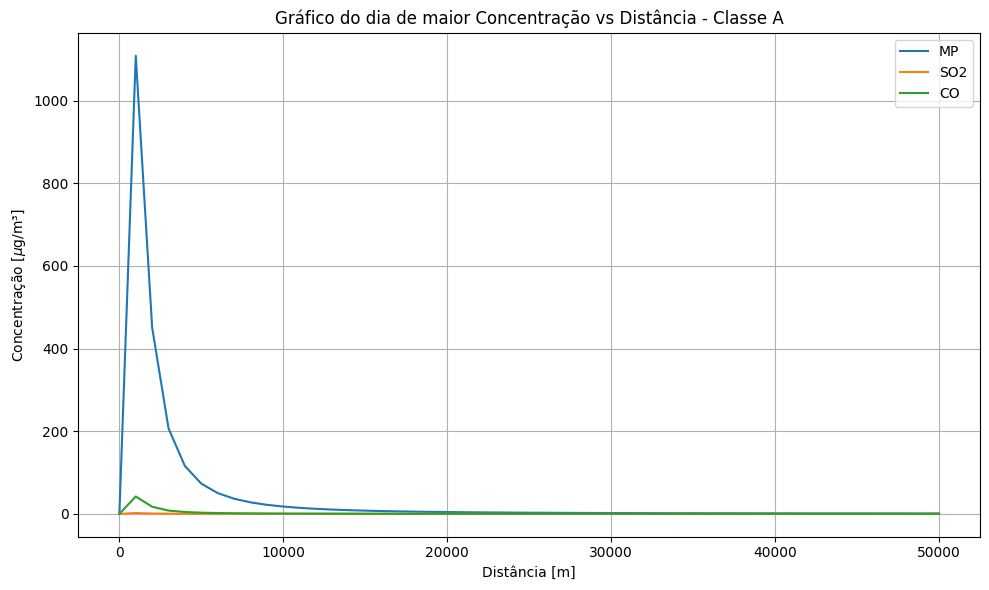

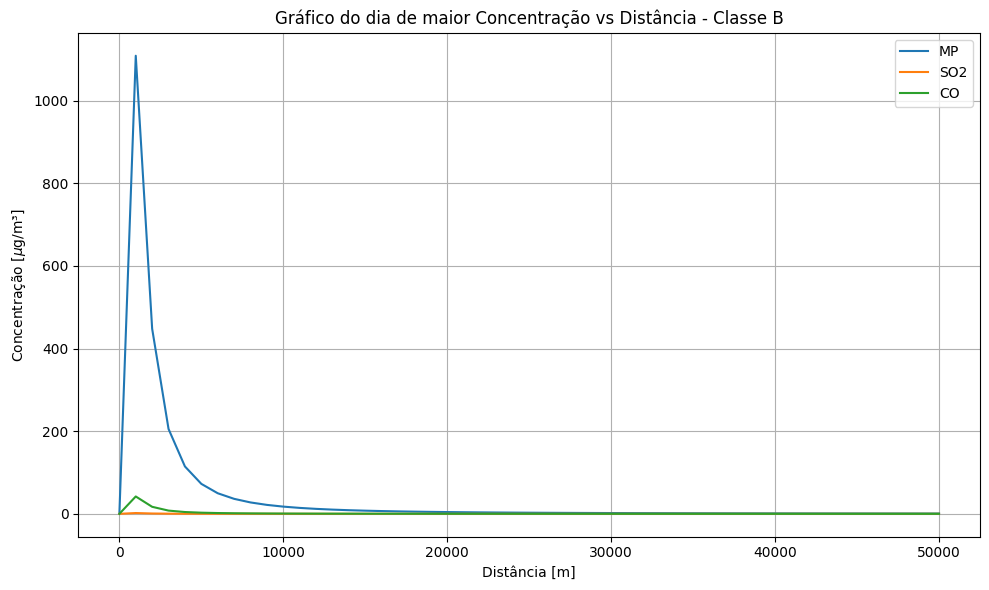

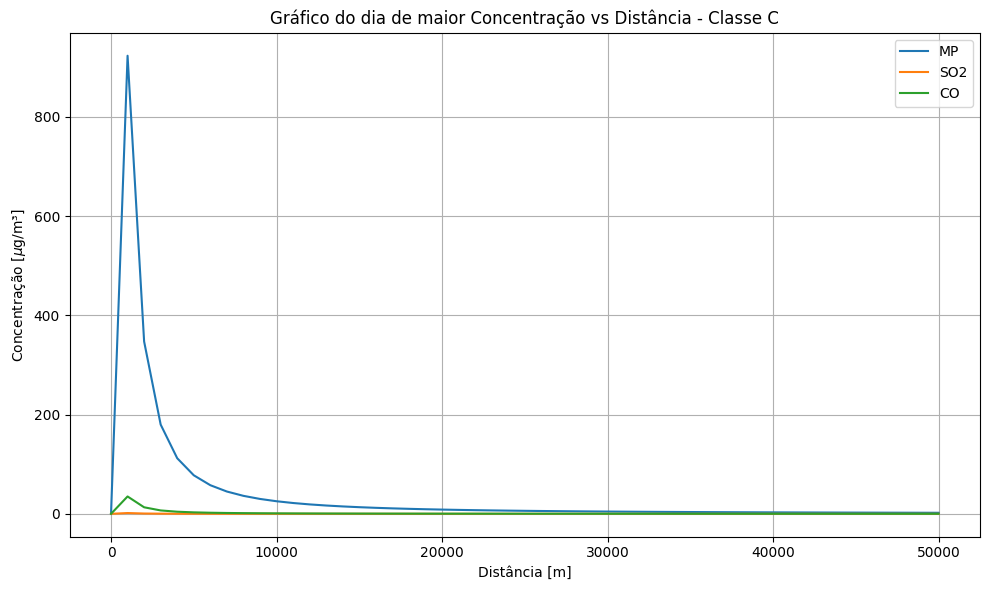

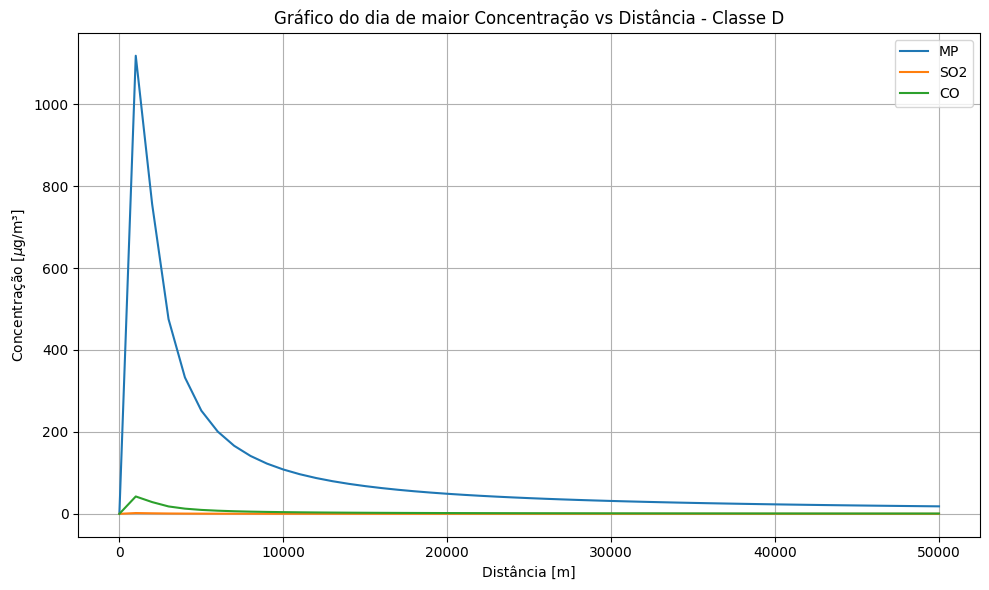

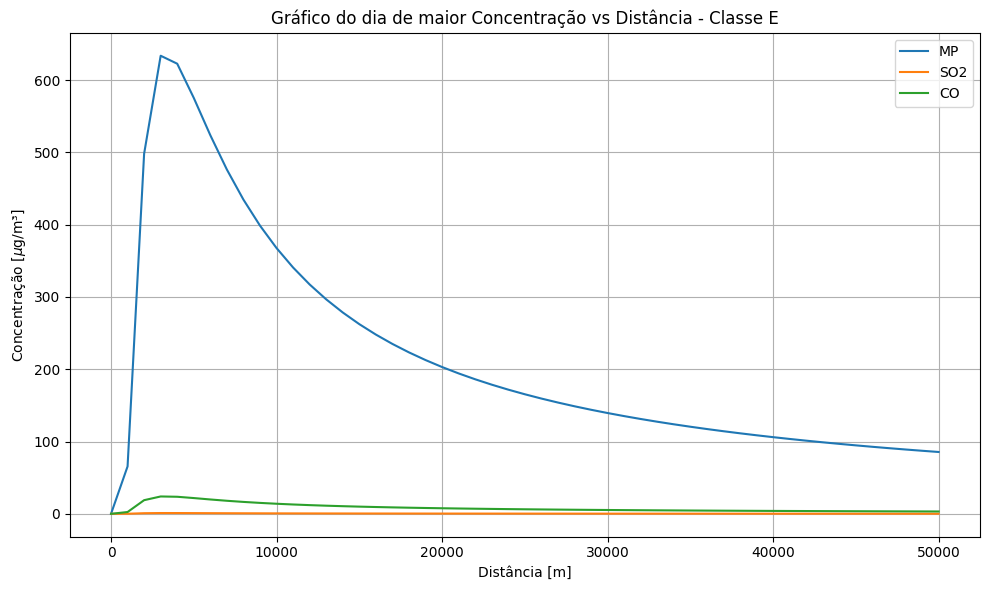

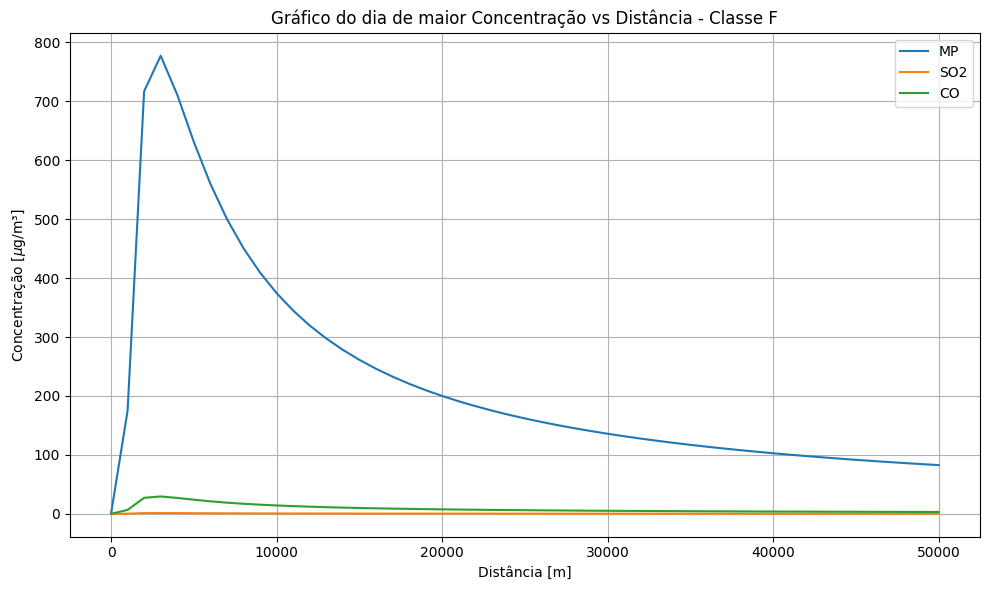

In [145]:
# Criando gráficos separados para cada classe com os três poluentes

# Definindo uma lista de dataframes e seus respectivos rótulos
dfs = [df_Amax, df_Bmax, df_Cmax, df_Dmax, df_Emax, df_Fmax]
labels = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E', 'Classe F']

# Plotando cada dataframe em um gráfico separado
for df, label in zip(dfs, labels):
    plt.figure(figsize=(10, 6))  # Tamanho da figura
    # Plotando as três linhas para MP, SO2 e CO
    plt.plot(df['x'], df['MP'], label='MP')
    plt.plot(df['x'], df['SO2'], label='SO2')
    plt.plot(df['x'], df['CO'], label='CO')
    
    # Adicionar legendas e rótulos dos eixos
    plt.legend()  # Mostrar legenda com base nos labels
    plt.xlabel('Distância [m]')  # Rótulo do eixo x
    plt.ylabel('Concentração [$\mu$g/m³]')  # Rótulo do eixo y
    plt.title(f'Gráfico do dia de maior Concentração vs Distância - {label}')  # Título do gráfico
    plt.grid(True)  # Adicionar grade
    plt.tight_layout()  # Ajustar layout
    plt.show()


TypeError: Shapes of x (500, 1000) and z (8760, 51) do not match

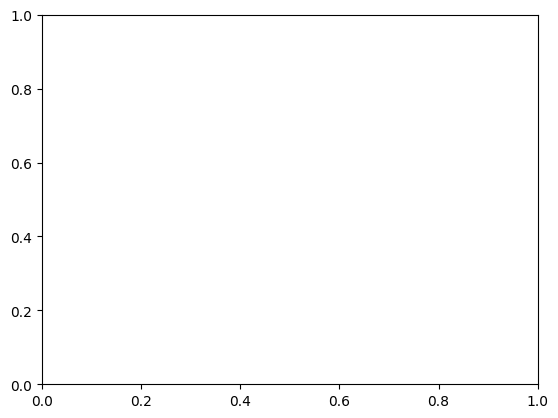

In [147]:
# Criando dominio de modelagem
x = np.linspace(0,50001,1000)
# print(x)
y = np.linspace(-10000,10000,500)

# Criando matrizes de x e y
xx,yy = np.meshgrid(x,y)
#print(xx.shape)

# Definindo uma lista de dataframes e seus respectivos rótulos
dfs = [df_Amax, df_Bmax, df_Cmax, df_Dmax, df_Emax, df_Fmax]
labels = ['Classe A', 'Classe B', 'Classe C', 'Classe D', 'Classe E', 'Classe F']

# Plotando cada dataframe em um gráfico separado
for df, label in zip(dfs, labels):
    # Visualização dos resultados no espaço
    import matplotlib.pyplot as plt
    from matplotlib.colors import LogNorm
    fig,ax = plt.subplots()
    ax.contourf(xx,yy,,norm = LogNorm())
    